Reinier Kruisbrink

Robbert van Koesveld

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import fsolve
import random

# Perfect Adaptation


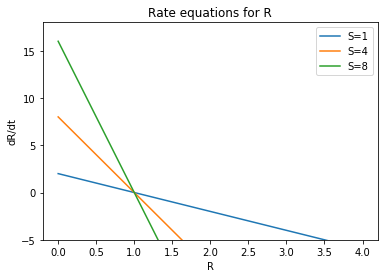

In [2]:
# a

def dRdt(S, X, R, k1=2, k2=2):
    return k1*S - k2*X*R

def dXdt(S, X, k3=1, k4=1):
    return k3*S - k4*X

# X = ((k3*S) - X)/(k4), dXdt=0 in steady state so X = (k3/k4)*S = S
# R = ((k1*S) - dRdt)/(k2*X), dRdt=0 in steady state so R = (k1*S)/(k2*X) = S/X = 1 (seen in plot!)
R = np.linspace(0,4,50)

plt.title('Rate equations for R')
S1 = X1 = 1
plt.plot(R, dRdt(S1, X1, R), label='S=1')
S4 = X4 = 4
plt.plot(R, dRdt(S4, X4, R), label='S=4')
S8 = X8 = 8
plt.plot(R, dRdt(S8, X8, R), label='S=8')
plt.xlabel('R')
plt.ylabel('dR/dt')
plt.ylim(-5,18)
plt.legend()
plt.show()

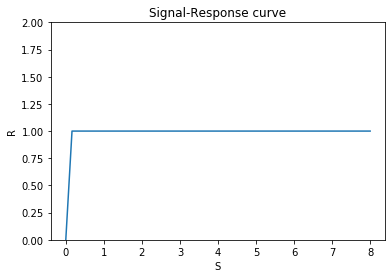

In [3]:
# b

def tmp(R, S, X):
    return 2*S - 2*X*R

S = X = np.linspace(0, 8, 50)
Rs = []
for s,x in zip(S,X):
    root = fsolve(tmp, 0, args=(s,x))
    Rs.append(root)

plt.title('Signal-Response curve')
plt.plot(S, Rs)
plt.xlabel('S')
plt.ylabel('R')
plt.ylim(0,2)
plt.show()

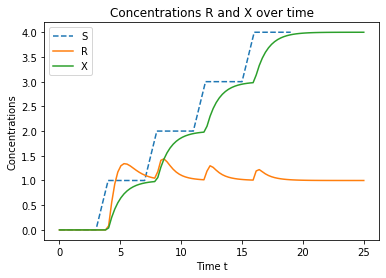

In [4]:
# c

def q1_model(concs, t):
    R, X = concs
    if t < 4:
        S = 0
    if t >= 4 and t < 8:
        S = 1
    if t >= 8 and t < 12:
        S = 2
    if t >= 12 and t < 16:
        S = 3
    if t >= 16:
        S = 4
    return [dRdt(S, X, R), dXdt(S, X)]

R0, X0 = 0, 0
t = np.linspace(0, 25, 100)
sol = odeint(q1_model, [R0, X0], t)

plt.title('Concentrations R and X over time')
plt.plot(np.arange(20), [0,0,0,0,1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4], '--', label='S')
plt.plot(t, sol[:,0], label='R')
plt.plot(t, sol[:,1], label='X')
plt.xlabel('Time t')
plt.ylabel('Concentrations')
plt.legend()
plt.show()

# Feedback Loops

In [5]:
#Goldbeter-Koshland function
def G(u,v,J,K):
    x=2*u*K
    y=v-u+(v*J)+(u*K)+np.sqrt(((v-u+(v*J)+(u*K))**2)-4*(v-u)*(u*K))
    return x/y

def Homeostasis(R,S,K_0,K_2,K_3,K_4,J_3,J_4):
    K_4R=K_4*R
    E=G(K_3,K_4R,J_3,J_4)
    return (K_0*E)-(K_2*S*R)

def Mutual_inhibition(R,S,K_0,K_1,K_2,K_2p,K_3,K_4,J_3,J_4):
    K_1S=K_1*S
    K_2R=K_2*R
    K_4R=K_4*R
    E=G(K_3,K_4R,J_3,J_4)
    K_2pER=K_2p*E*R
    return K_0+K_1S-K_2R-K_2pER

def Mutual_activation(R,S,K_0,K_1,K_2,K_3,K_4,J_3,J_4):
    K_3R=K_3*R
    E=G(K_3R,K_4,J_3,J_4)
    K_0E=K_0*E
    K_1S=K_1*S
    K_2R=K_2*R    
    return K_0E+K_1S-K_2R

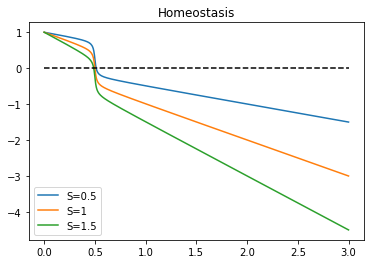

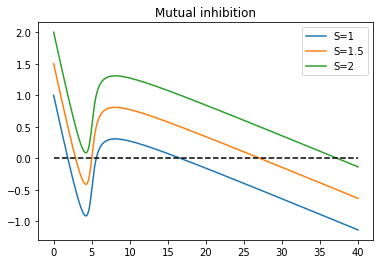

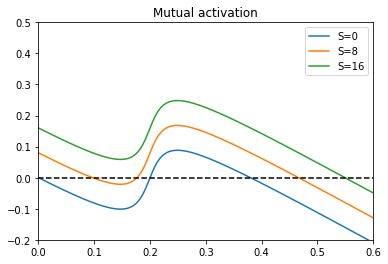

In [6]:
# a

#homeostasis run
K_0=1
K_2=1
K_3=0.5
K_4=1
J_3=0.01
J_4=J_3
x = np.linspace(0, 3, 1000)

#getting the results for all S variants
results_Homeostasis_S1=[]
S1=0.5
for i in x:
    results_Homeostasis_S1.append(Homeostasis(i,S1,K_0,K_2,K_3,K_4,J_3,J_4)) 

results_Homeostasis_S2=[]
S2=1
for i in x:
    results_Homeostasis_S2.append(Homeostasis(i,S2,K_0,K_2,K_3,K_4,J_3,J_4)) 

results_Homeostasis_S3=[]
S3=1.5
for i in x:
    results_Homeostasis_S3.append(Homeostasis(i,S3,K_0,K_2,K_3,K_4,J_3,J_4)) 

#plotting the results
plt.plot(x,results_Homeostasis_S1)
plt.plot(x,results_Homeostasis_S2)
plt.plot(x,results_Homeostasis_S3)
plt.plot(x,[0]*x, '--', color='black')
plt.title('Homeostasis')
plt.legend(['S=0.5','S=1','S=1.5'])
plt.show()



#mutual inhibition run
K_0=0
K_1=1
K_2=0.05
K_2p=0.5
K_3=1
K_4=0.2
J_3=0.05
J_4=J_3
x = np.linspace(0, 40, 1000)

#getting the results for all S variants
results_Mutual_inhibition_S1=[]
S1=1
for i in x:
    results_Mutual_inhibition_S1.append(Mutual_inhibition(i,S1,K_0,K_1,K_2,K_2p,K_3,K_4,J_3,J_4)) 


results_Mutual_inhibition_S2=[]
S2=1.5
for i in x:
    results_Mutual_inhibition_S2.append(Mutual_inhibition(i,S2,K_0,K_1,K_2,K_2p,K_3,K_4,J_3,J_4)) 

    
results_Mutual_inhibition_S3=[]
S3=2
for i in x:
    results_Mutual_inhibition_S3.append(Mutual_inhibition(i,S3,K_0,K_1,K_2,K_2p,K_3,K_4,J_3,J_4)) 

    
#plotting the results    
plt.plot(x,results_Mutual_inhibition_S1)
plt.plot(x,results_Mutual_inhibition_S2)
plt.plot(x,results_Mutual_inhibition_S3)
plt.plot(x,[0]*x, '--', color='black')
#plt.xlim(35,40)

plt.title('Mutual inhibition')
plt.legend(['S=1','S=1.5','S=2'])
plt.show()

#Mutual_activation run
K_0=0.4
K_1=0.01
K_2=1
K_3=K_2
K_4=0.2
J_3=0.05
J_4=J_3
x = np.linspace(0, 3, 1000)


#getting the results for all s variants
results_Mutual_activation_S1=[]
S1=0
for i in x:
    results_Mutual_activation_S1.append(Mutual_activation(i,S1,K_0,K_1,K_2,K_3,K_4,J_3,J_4))
    
results_Mutual_activation_S2=[]
S2=8
for i in x:
    results_Mutual_activation_S2.append(Mutual_activation(i,S2,K_0,K_1,K_2,K_3,K_4,J_3,J_4))
     
results_Mutual_activation_S3=[]
S3=16
for i in x:
    results_Mutual_activation_S3.append(Mutual_activation(i,S3,K_0,K_1,K_2,K_3,K_4,J_3,J_4))
    

    
#plotting the results
plt.plot(x,results_Mutual_activation_S1)
plt.plot(x,results_Mutual_activation_S2)
plt.plot(x,results_Mutual_activation_S3)
plt.plot(x,[0]*x, '--', color='black')

plt.xlim(0,0.6)
plt.ylim(-0.2,0.5)
plt.title('Mutual activation')
plt.legend(['S=0','S=8','S=16'])
plt.show()

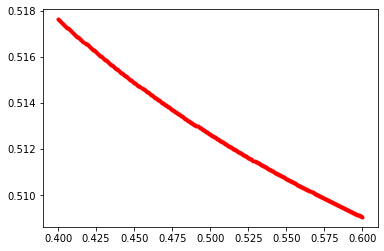

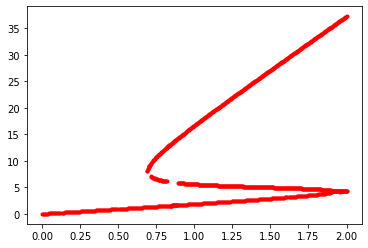

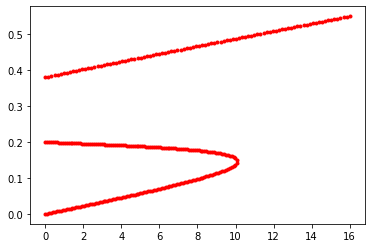

In [14]:
# b

#signal-response curve of homeostasis
t=np.linspace(0.4,0.6,300)
need=[]
for i in t:
    K_0=1
    K_2=1
    K_3=0.5
    K_4=1
    J_3=0.01
    J_4=J_3   
    need.append(fsolve(Homeostasis,0,(i,K_0,K_2,K_3,K_4,J_3,J_4)))

plt.plot(t,need, '.', color='red')
plt.show()


#signal response of Mutual inhibition
t=np.linspace(0,2,300)
t1=np.linspace(0.69,2,300)
need1=[]
need2=[]
need3=[]

for i in t:
    K_0=0
    K_1=1
    K_2=0.05
    K_2p=0.5
    K_3=1
    K_4=0.2
    J_3=0.05
    J_4=J_3
    need1.append(fsolve(Mutual_inhibition,0,(i,K_0,K_1,K_2,K_2p,K_3,K_4,J_3,J_4)))

for i in t1:
    K_0=0
    K_1=1
    K_2=0.05
    K_2p=0.5
    K_3=1
    K_4=0.2
    J_3=0.05
    J_4=J_3
    need2.append(fsolve(Mutual_inhibition,4.5,(i,K_0,K_1,K_2,K_2p,K_3,K_4,J_3,J_4)))
    need3.append(fsolve(Mutual_inhibition,15,(i,K_0,K_1,K_2,K_2p,K_3,K_4,J_3,J_4)))

    
plt.plot(t,need1, '.', color='red')
plt.plot(t1,need2, '.', color='red')
plt.plot(t1,need3, '.', color='red')
plt.show()


#signal response of Mutual inhibition Mutual activation
t=np.linspace(0,10.1,100)
t1=np.linspace(0,16,100)
t2=np.linspace(0,10.1,100)
need4=[]
for i in t:
    K_0=0.4
    K_1=0.01
    K_2=1
    K_3=K_2
    K_4=0.2
    J_3=0.05
    J_4=J_3
    need4.append(fsolve(Mutual_activation,0,(i,K_0,K_1,K_2,K_3,K_4,J_3,J_4)))
need5=[]
need6=[]
for i in t1:
    K_0=0.4
    K_1=0.01
    K_2=1
    K_3=K_2
    K_4=0.2
    J_3=0.05
    J_4=J_3
    need6.append(fsolve(Mutual_activation,0.3,(i,K_0,K_1,K_2,K_3,K_4,J_3,J_4)))
for i in t2:
    K_0=0.4
    K_1=0.01
    K_2=1
    K_3=K_2
    K_4=0.2
    J_3=0.05
    J_4=J_3
    need5.append(fsolve(Mutual_activation,0.2,(i,K_0,K_1,K_2,K_3,K_4,J_3,J_4)))
    
    
plt.plot(t,need4, '.', color='red')
plt.plot(t2,need5, '.', color='red')
plt.plot(t1,need6, '.', color='red')
plt.show()

# The LAC-operon

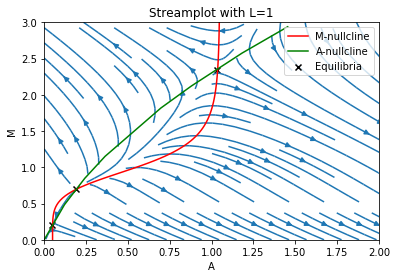

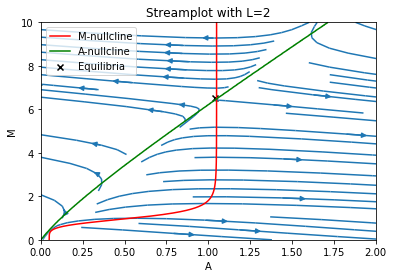

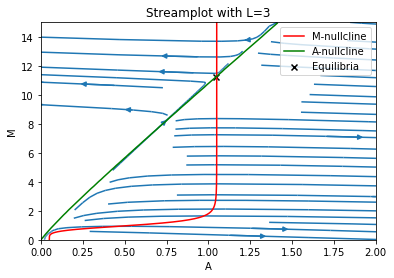

In [8]:
# b

def dMdt(M, A, k1=.05, k2=1, k3=1, n=5):
    return k1 + k2*(1 - 1/(1 + A**n)) - k3*M

def dAdt(M, A, k4=1, k5=.2, Km=2, Vmax=1, L=1):
    return k4*M*L - k5*A - Vmax*((M*A)/(Km + A))

def M_null(A, k1=.05, k2=1, k3=1, n=5):
    return k1/k3 + (k2/k3)*((A**n)/(1 + A**n))

def A_null(x, y, L=1):
    # numerically
    Ax, Ay = [], []
    for ax in x:
        for ay in y:
            tmp = dAdt(ax , ay, L=l)
            if tmp >= 0 and tmp < 0.003:
                Ax.append(ax)
                Ay.append(ay)
    return Ax, Ay





l = 1
x = np.linspace(0, 3, 100)
y = np.linspace(0, 3, 100)
xu, yv = np.meshgrid(x, y, indexing='xy')
u = dAdt(xu, yv, L=l)
v = dMdt(xu, yv)
plt.title(f'Streamplot with L={l}')
plt.streamplot(x, y, u, v)
plt.plot(M_null(x), x, label='M-nullcline', color='red')
Ax, Ay = A_null(x, y, L=l)
plt.plot(Ax, Ay, label='A-nullcline', color='green')
plt.scatter([.045,.19,1.03], [.2,.7,2.34], marker='x', color='black', label='Equilibria')
plt.xlabel('A')
plt.ylabel('M')
plt.legend()
plt.xlim(0,2)
plt.show()

l=2
x = np.linspace(0, 10, 1000)
y = np.linspace(0, 10, 1000)
xu, yv = np.meshgrid(x, y, indexing='xy')
u = dAdt(xu, yv, L=l)
v = dMdt(xu, yv)
plt.title(f'Streamplot with L={l}')
plt.streamplot(x, y, u, v)
plt.plot(M_null(x), x, label='M-nullcline', color='red')
Ax, Ay = A_null(x, y, L=l)
plt.plot(Ax, Ay, label='A-nullcline', color='green')
plt.scatter([1.041], [6.5], marker='x', color='black', label='Equilibria')
plt.xlabel('A')
plt.ylabel('M')
plt.legend()
plt.xlim(0,2)
plt.show()

l=3
x = np.linspace(0, 15, 1000)
y = np.linspace(0, 15, 1000)
xu, yv = np.meshgrid(x, y, indexing='xy')
u = dAdt(xu, yv, L=l)
v = dMdt(xu, yv)
plt.title(f'Streamplot with L={l}')
plt.streamplot(x, y, u, v)
plt.plot(M_null(x), x, label='M-nullcline', color='red')
Ax, Ay = A_null(x, y, L=l)
plt.plot(Ax, Ay, label='A-nullcline', color='green')
plt.scatter([1.045], [11.2], marker='x', color='black', label='Equilibria')
plt.xlabel('A')
plt.ylabel('M')
plt.legend()
plt.xlim(0,2)
plt.show()

In [9]:
# c

L = 1
print(f'L={L}')
A,M = .045, .2
a = -1
b = (5*A**4)/(1 + A**5)**2
c = L - A/(2 + A)
d = -0.2 - (2*M)/(2 + A)**2
J = [[a,b],[c,d]]
print(np.linalg.eig(J)[0], 'stable equilibrium')

A,M = .19, .7
a = -1
b = (5*A**4)/(1 + A**5)**2
c = L - A/(2 + A)
d = -0.2 - (2*M)/(2 + A)**2
J = [[a,b],[c,d]]
print(np.linalg.eig(J)[0], 'stable equilibrium')

A,M = 1.03, 2.34
a = -1
b = (5*A**4)/(1 + A**5)**2
c = L - A/(2 + A)
d = -0.2 - (2*M)/(2 + A)**2
J = [[a,b],[c,d]]
print(np.linalg.eig(J)[0], 'saddle equilibrium')

#------------------------
L = 2
print(f'L={L}')
A,M = 1.041, 6.5
a = -1
b = (5*A**4)/(1 + A**5)**2
c = L - A/(2 + A)
d = -0.2 - (2*M)/(2 + A)**2
J = [[a,b],[c,d]]
print(np.linalg.eig(J)[0], 'saddle equilibrium')

#------------------------
L = 3
print(f'L={L}')
A,M = 1.045, 11.2
a = -1
b = (5*A**4)/(1 + A**5)**2
c = L - A/(2 + A)
d = -0.2 - (2*M)/(2 + A)**2
J = [[a,b],[c,d]]
print(np.linalg.eig(J)[0], 'saddle equilibrium')

L=1
[-1.00002847 -0.29561898] stable equilibrium
[-1.01144808 -0.48045576] stable equilibrium
[-1.75917404  0.0494201 ] saddle equilibrium
L=2
[ 0.13318228 -2.73894012] saddle equilibrium
L=3
[ 0.13952301 -3.75539225] saddle equilibrium


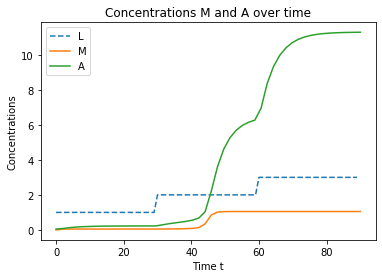

In [10]:
# d

def q3_model(concs, t):
    M0, A0 = concs
    if t < 30:
        l = 1
    if t >= 30 and t < 60:
        l = 2
    if t >= 60:
        l = 3
    return [dMdt(M0, A0), dAdt(M0, A0, L=l)]

t = np.linspace(0,90)
M0, A0 = 0, 0.05
sol = odeint(q3_model, [M0, A0], t)

plt.title('Concentrations M and A over time')
L = np.append(np.append([1]*30, [2]*30), [3]*30) 
plt.plot(np.arange(90), L, '--', label='L')
plt.plot(t, sol[:,0], label='M')
plt.plot(t, sol[:,1], label='A')
plt.xlabel('Time t')
plt.ylabel('Concentrations')
plt.legend()
plt.show()

# Ionic Channels

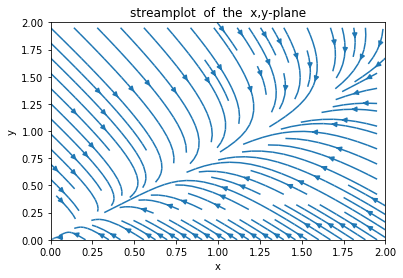

In [11]:
# b

def dxdt(x, y, k1, k2):
    if k1 < 0:
        raise Exception('k1 cant be less then 0')
    if k2 < 0:
        raise Exception('k2 cant be less then 0')
    return k2*y - k1*x

def dydt(x, y, k1, k2, k3):
    if k1 < 0:
        raise Exception('k1 cant be less then 0')
    if k2 < 0:
        raise Exception('k2 cant be less then 0')
    if k3 < 0:
        raise Exception('k3 cant be less then 0')
    return k1*x - (k2 + k3)*y

def dzdt(y, k3):
    if k3 < 0:
        raise Exception('k3 cant be less then 0')
    return k3*y

k1=2
k2=2
k3=1

x = np.linspace(0, 2, 100)
y = np.linspace(0, 2, 100)
xu, yv = np.meshgrid(x, y, indexing='xy')
u = dxdt(xu, yv, k1, k2)
v = dydt(xu, yv, k1, k2, k3)
#v = dzdt(yv, k3)

plt.title('streamplot  of  the  x,y-plane')
plt.streamplot(x, y, u, v)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

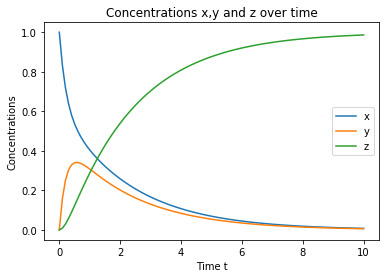

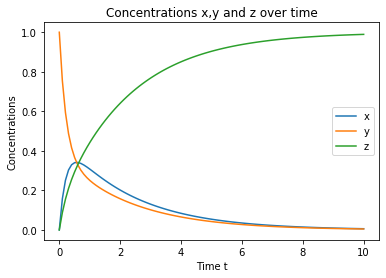

In [12]:
# c (Does your result correspond to your predictions in(a) and (b)?)

def q4_model(concs, t, k1, k2, k3):
    x, y, z = concs
    return [dxdt(x, y, k1, k2), dydt(x, y, k1, k2, k3), dzdt(y, k3)]


t = np.linspace(0, 10, 100)

sol1 = odeint(q4_model, [1, 0, 0], t, args=(2,2,1))
plt.title('Concentrations x,y and z over time')
plt.plot(t, sol1[:,0], label='x')
plt.plot(t, sol1[:,1], label='y')
plt.plot(t, sol1[:,2], label='z')
plt.xlabel('Time t')
plt.ylabel('Concentrations')
plt.legend(loc='right')
plt.show()

sol2 = odeint(q4_model, [0, 1, 0], t, args=(2,2,1))
plt.title('Concentrations x,y and z over time')
plt.plot(t, sol2[:,0], label='x')
plt.plot(t, sol2[:,1], label='y')
plt.plot(t, sol2[:,2], label='z')
plt.xlabel('Time t')
plt.ylabel('Concentrations')
plt.legend()
plt.show()

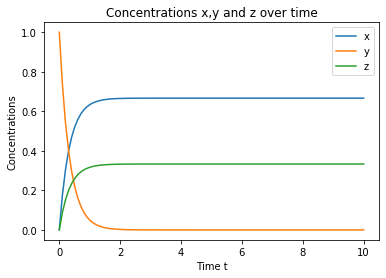

In [13]:
# f

sol = odeint(q4_model, [0, 1, 0], t, args=(0,2,1))
plt.title('Concentrations x,y and z over time')
plt.plot(t, sol[:,0], label='x')
plt.plot(t, sol[:,1], label='y')
plt.plot(t, sol[:,2], label='z')
plt.xlabel('Time t')
plt.ylabel('Concentrations')
plt.legend()
plt.show()